❗Nota importante: El cuaderno de trabajo debe ser ejecutado usando la opción de aceleración de hardware mediante GPU. Dicha unidad es usada tanto en entrenamiento como en inferencia, como en el análisis de errores para las redes neuronales. 

In [ ]:
# Importar librerías básicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Importar módulos de sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [ ]:
# Especificar columnas
relevant_columns = ['Tienda','FORMATO','REGION','Categoria','Proveedor','DEPTO','SDEPTO','CLASE','SCLASE','Mes','DiaSem','Sem','Decil','Importado','MarcaPropia','EnOferta','Existencia','Desplazamiento','Y_Faltante']
numerical_columns = ['Decil','Existencia','Desplazamiento','EnOferta']
categorical_columns = ['Tienda','FORMATO','REGION','Categoria','Proveedor','DEPTO','SDEPTO','CLASE','SCLASE','Mes','DiaSem','Sem','Importado','MarcaPropia']
target_column = ['Y_Faltante']
data_columns = ['Decil','Existencia','Desplazamiento','Y_Faltante']

In [ ]:
# Abrir el archivo
file = 'Datos_faltante_sin_historico.csv'
data = pd.read_csv(file, header=0, usecols=data_columns)
print('rows:', data.shape[0], ' columns:', data.shape[1])

rows: 3889  columns: 4


In [ ]:
data

,Decil,Existencia,Desplazamiento,Y_Faltante
0,1,696,10820,0
1,1,1113,4783,0
2,1,283,979,0
3,1,74,199,0
4,4,12,42,0
...,...,...,...,...
3884,4,0,118,1
3885,4,0,118,1
3886,4,0,31,1
3887,4,0,31,1


In [ ]:
# Buscamos datos nulos dentro de las características numéricas de nuestras variables
total = data.isnull().sum()
percent = (
        data.isnull().sum() \
        / data.isnull().count()*100
        )
pd.concat([total,percent], axis=1, \
        keys=['Total','Percent']).transpose()

,Decil,Existencia,Desplazamiento,Y_Faltante
Total,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0


yes %: 49.601439958858315- no %: 50.398560041141685


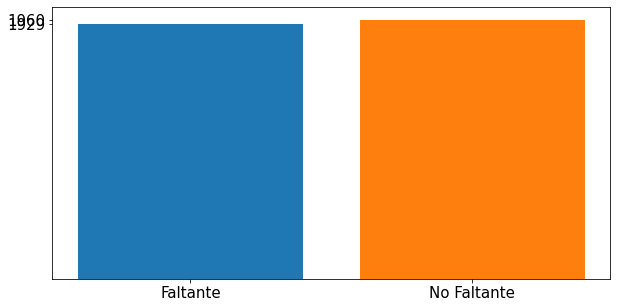

In [ ]:
# Revisamos la proporción de datos
target = data['Y_Faltante']
yes = target[target == 1].count()
no = target[target == 0].count()
print('yes %: ' + str(yes/len(target)*100) + '- no %: ' \
        + str(no/len(target)*100))


fig, ax = plt.subplots(figsize=(10,5))
plt.bar("Faltante", yes)
plt.bar("No Faltante", no)
ax.set_yticks([yes,no])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [ ]:
# Balanceamos a 50% - 50% nuestro conjunto de datos.
data_yes = data[data["Y_Faltante"] == 1]
data_no = data[data["Y_Faltante"] == 0]
over_sampling = data_yes.sample(no, replace=True, \
random_state = 0)
balanced_data = pd.concat([data_no, over_sampling], \
axis=0)

In [ ]:
# Aislamos las variables numéricas y realizamos sobre ellas un min-max scaling. 
balanced_data = balanced_data.reset_index(drop=True)
decil = balanced_data['Decil']

numerical = balanced_data.drop(columns=["Decil","Y_Faltante"])
numerical_scaled = (numerical - numerical.min())/(numerical.max() - numerical.min()) 

faltante = balanced_data["Y_Faltante"]

In [ ]:
# Guardamos una copia de nuestros datos balanceados. 
balanced_data = pd.concat([decil,numerical_scaled,faltante], axis=1)
balanced_data.to_csv("dccc_prepared.csv", index=False)
balanced_data

,Decil,Existencia,Desplazamiento,Y_Faltante
0,1,0.178903,0.151335,0
1,1,0.192479,0.066898,0
2,1,0.165457,0.013693,0
3,1,0.158652,0.002783,0
4,4,0.156634,0.000587,0
...,...,...,...,...
3915,4,0.156243,0.003748,1
3916,3,0.156243,0.000182,1
3917,3,0.156243,0.000000,1
3918,4,0.156341,0.000769,1


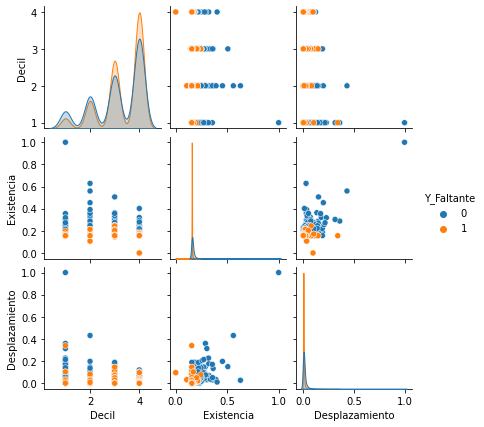

In [ ]:
# Gráfico de relaciones por pares
sns.pairplot(balanced_data, hue='Y_Faltante', height=2.);

In [ ]:
balanced_data

,Decil,Existencia,Desplazamiento,Y_Faltante
0,1,0.178903,0.151335,0
1,1,0.192479,0.066898,0
2,1,0.165457,0.013693,0
3,1,0.158652,0.002783,0
4,4,0.156634,0.000587,0
...,...,...,...,...
3915,4,0.156243,0.003748,1
3916,3,0.156243,0.000182,1
3917,3,0.156243,0.000000,1
3918,4,0.156341,0.000769,1


In [ ]:
data_shuffled = balanced_data.sample(frac=1).reset_index(drop=True)
data = data_shuffled
data

,Decil,Existencia,Desplazamiento,Y_Faltante
0,4,0.177373,0.044603,0
1,4,0.158782,0.001301,1
2,4,0.175387,0.015875,1
3,3,0.156471,0.000406,0
4,4,0.156243,0.000615,1
...,...,...,...,...
3915,4,0.156243,0.000224,1
3916,4,0.156341,0.000769,1
3917,4,0.160247,0.003958,0
3918,3,0.184828,0.018071,0


In [ ]:
data.shape[0],data.shape[1]

(3920, 4)

In [ ]:
data['Y_Faltante'].value_counts()

0    1960
1    1960
Name: Y_Faltante, dtype: int64

yes %: 50.0- no %: 50.0


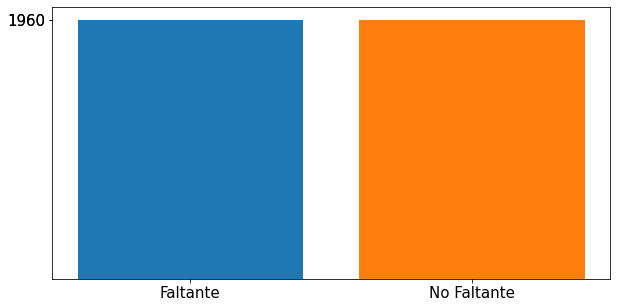

In [ ]:
# Verificamos que el conjunto de datos está perfectamente balanceado
# Revisamos la proporción de datos
target = data['Y_Faltante']
yes = target[target == 1].count()
no = target[target == 0].count()
print('yes %: ' + str(yes/len(target)*100) + '- no %: ' \
        + str(no/len(target)*100))


fig, ax = plt.subplots(figsize=(10,5))
plt.bar("Faltante", yes)
plt.bar("No Faltante", no)
ax.set_yticks([yes,no])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [ ]:
data = data.reset_index(drop=True)
X = data.drop(columns=["Y_Faltante"])
y = data["Y_Faltante"]
X.head()

,Decil,Existencia,Desplazamiento
0,4,0.177373,0.044603
1,4,0.158782,0.001301
2,4,0.175387,0.015875
3,3,0.156471,0.000406
4,4,0.156243,0.000615


# Primer Prueba 
* Agrupación K-Means
* Variables de interés escaladas (excepto Decil y K-Medoids)
* Escalamiento MinMax
* Sin eliminar outliers

In [ ]:
X_new, X_test, y_new, y_test = train_test_split(X,y, test_size=0.2, random_state=0)
dev_per = X_test.shape[0]/X_new.shape[0]
X_train, X_dev, y_train, y_dev = train_test_split(X_new, y_new, test_size=dev_per, random_state=0)

In [ ]:
# Generamos una copia de nuestros conjuntos de datos para esta primera ronda de experimentos
X1 = X.copy()
y1 = y.copy()
data1 = pd.concat([X1,y1],axis=1)

In [ ]:
# Visualizamos nuestros datos
data1

,Decil,Existencia,Desplazamiento,Y_Faltante
0,3,0.156243,0.000000,1
1,1,0.159140,0.005790,0
2,4,0.156243,0.001622,1
3,4,0.156243,0.017287,1
4,4,0.161940,0.003776,0
...,...,...,...,...
3915,3,0.176852,0.021595,0
3916,4,0.171545,0.012616,1
3917,4,0.158750,0.002336,0
3918,3,0.156243,0.000126,1


In [ ]:
# Algunas estadísticas de nuestros datos
data1.describe()

,Decil,Existencia,Desplazamiento,Y_Faltante
count,3920.000000,3920.000000,3920.000000,3920.000000
mean,3.217602,0.163476,0.008547,0.500000
std,0.928605,0.026965,0.026955,0.500064
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.156243,0.000518,0.000000
50%,3.000000,0.157024,0.001944,0.500000
75%,4.000000,0.160606,0.006899,1.000000
max,4.000000,1.000000,1.000000,1.000000


yes %: 50.0- no %: 50.0


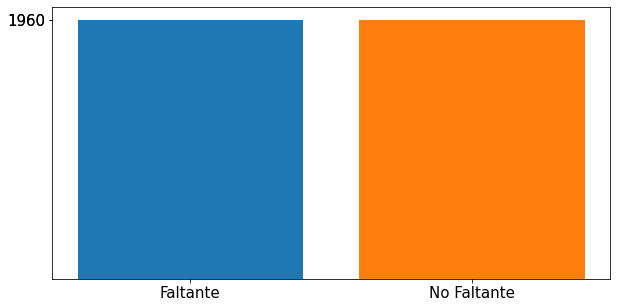

In [ ]:
# Revisamos la proporción de datos
target = data1['Y_Faltante']
yes = target[target == 1].count()
no = target[target == 0].count()
print('yes %: ' + str(yes/len(target)*100) + '- no %: ' \
        + str(no/len(target)*100))


fig, ax = plt.subplots(figsize=(10,5))
plt.bar("Faltante", yes)
plt.bar("No Faltante", no)
ax.set_yticks([yes,no])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

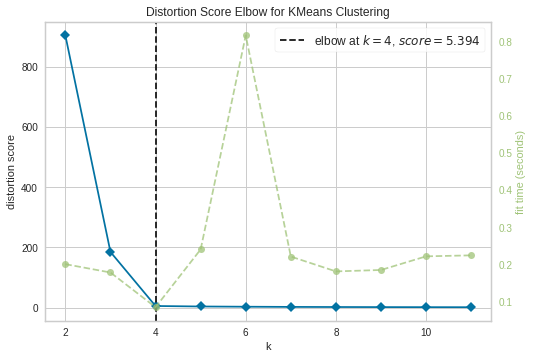

In [ ]:
# Método del codo
#!pip install yellowbrick
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

km = KMeans()
visualizer = KElbowVisualizer(km, k=(2,12), metric='distortion')
visualizer.fit(X)
visualizer.show();

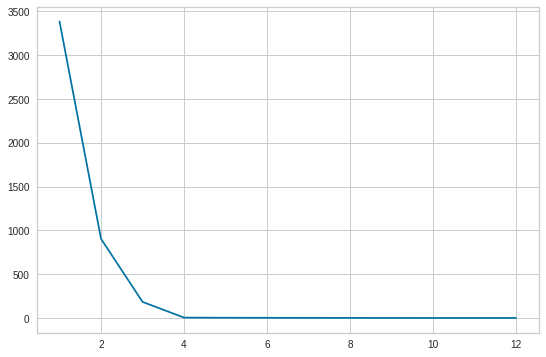

In [ ]:
# Método del codo
distortions = []
for k in range(1,13):
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X1)
    distortions.append(kmeanModel.inertia_)

fig, ax = plt.subplots(figsize = (9,6))
sns.lineplot(x=range(1,13), y=distortions, ax=ax);

In [ ]:
# Particionar el dataset en 4 clusters
km = KMeans(n_clusters=4, max_iter=1000, random_state=0).fit(X)
X['K_Means'] = km.labels_

In [ ]:
# Transformar en tipo de datos categórico
X['Decil'] = pd.Categorical(X.Decil)
X['K_Means'] = pd.Categorical(X.K_Means)

In [ ]:
# Observamos el conjunto de características final
X1

,Decil,Existencia,Desplazamiento,K_Means
0,3,0.156243,0.000000,2
1,1,0.159140,0.005790,3
2,4,0.156243,0.001622,1
3,4,0.156243,0.017287,1
4,4,0.161940,0.003776,1
...,...,...,...,...
3915,3,0.176852,0.021595,2
3916,4,0.171545,0.012616,1
3917,4,0.158750,0.002336,1
3918,3,0.156243,0.000126,2


In [ ]:
# Se construyen los conjuntos de entrenamiento y prueba sobre los que se aplicarán algoritmos de machine learning
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=0)
print('Entrenamiento:', X1_train.shape[0], ' Prueba:', X1_test.shape[0])

Entrenamiento: 3136  Prueba: 784


# Aplicación de algoritmos

In [ ]:
# Importar modelos
# !pip install xgboost
# !pip install lightgbm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [ ]:
# Lista de modelos
seed=0

models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('LOGIT', LogisticRegression(random_state=seed)))
models.append(('SVC', SVC(random_state=seed)))
models.append(('RF', RandomForestClassifier(random_state=seed)))
models.append(('ADABOOST', AdaBoostClassifier(random_state=seed)))
models.append(('GBC', GradientBoostingClassifier(random_state=seed)))
#models.append(('XGB', XGBClassifier(eval_metric='mlogloss', seed=seed)))
models.append(('LGBM', LGBMClassifier(random_state=seed)))
models.append(('DeciTree', DecisionTreeClassifier()))
models.append(('AdaBoost', AdaBoostClassifier()))

In [ ]:
for name, model in models:
        model.fit(X_train, y_train)
        y_predict =  model.predict(X_test)
        print(f'\nPrecisión entrenamiento {name}:', model.score(X_train, y_train).round(4))
        print(f'Precisión prueba {name}:', model.score(X_test, y_test).round(4))
        del y_predict


Precisión entrenamiento KNN: 0.8682
Precisión prueba KNN: 0.8023

Precisión entrenamiento NB: 0.5889
Precisión prueba NB: 0.5893

Precisión entrenamiento LOGIT: 0.6059
Precisión prueba LOGIT: 0.6237

Precisión entrenamiento SVC: 0.5451
Precisión prueba SVC: 0.551

Precisión entrenamiento RF: 0.997
Precisión prueba RF: 0.8559

Precisión entrenamiento ADABOOST: 0.8236
Precisión prueba ADABOOST: 0.8048

Precisión entrenamiento GBC: 0.8597
Precisión prueba GBC: 0.8253

Precisión entrenamiento LGBM: 0.9137
Precisión prueba LGBM: 0.8304

Precisión entrenamiento DeciTree: 0.997
Precisión prueba DeciTree: 0.8291

Precisión entrenamiento AdaBoost: 0.8236
Precisión prueba AdaBoost: 0.8048


# Análisis de Errores

## Vanilla Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)
rfc.predict(X_test)
acc_train = rfc.score(X_train,y_train)
acc_test = rfc.score(X_test,y_test)

print(f'Precisión entrenamiento: {acc_train.round(4)}, Presición validación: {acc_test.round(4)}')

Precisión entrenamiento: 0.997, Presición validación: 0.8559


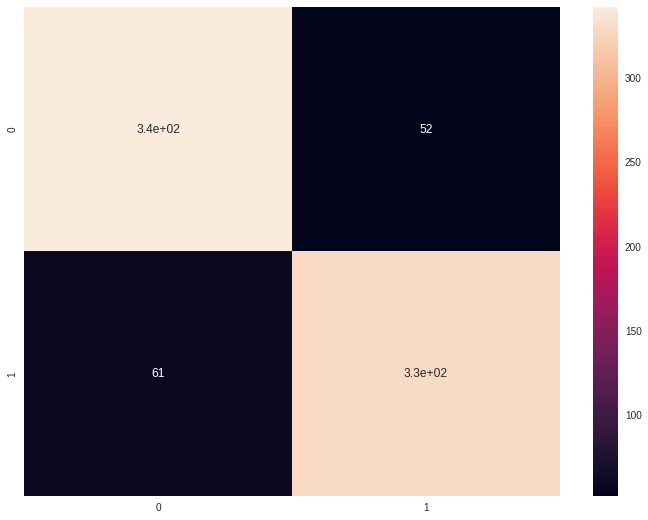

In [ ]:
from sklearn.metrics import confusion_matrix
#y_test = label_test
y_pred = rfc.predict(X_test)
mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 9))
sns.heatmap(mat, annot=True)
plt.show()

In [ ]:
# Calculamos las entradas de la matriz de confusión
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
tn,fp,fn,tp

(342, 52, 61, 329)

In [ ]:
accuracy = accuracy_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
balanced_accuracy = balanced_accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
print(f'Accuracy: {accuracy}')
print(f'True Positive Rate {recall}')
print(f'Precision {precision}')
print(f'Balanced accuracy {balanced_accuracy}')
print(f'f1 score {f1}')

Accuracy: 0.8558673469387755
True Positive Rate 0.8435897435897436
Precision 0.863517060367454
Balanced accuracy 0.8558050240791357
f1 score 0.8534370946822308


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.3 MB 5.2 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


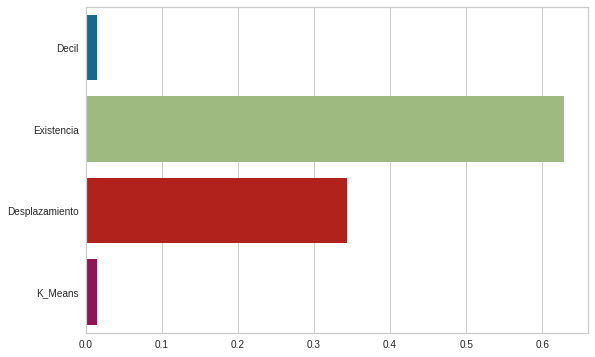

In [ ]:
!pip install matplotlib==3.4
# Graficamos la importancia de las variables
# Graficar la importancia de las variables
fi1 = pd.Series(rfc.feature_importances_, index=X1.columns)

fig, ax = plt.subplots(figsize = (9,6))
sns.barplot(x=fi1.values, y=fi1.index, ax=ax)
#ax.bar_label(ax.containers[0]);

In [ ]:
# Imprimimos un reporte de clasificación
from sklearn.metrics import classification_report
target_names = ['Faltante', 'No Faltante']
print(classification_report(y1_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    Faltante       0.88      0.86      0.87       358
 No Faltante       0.88      0.90      0.89       426

    accuracy                           0.88       784
   macro avg       0.88      0.88      0.88       784
weighted avg       0.88      0.88      0.88       784



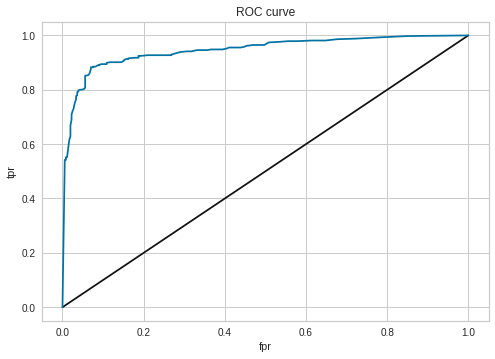

In [ ]:
from sklearn.metrics import roc_curve
y_pred_proba = rfc.predict_proba(X1_test)[:,1]
fpr, tpr, thresholds = roc_curve(y1_test, y_pred_proba)
plt.plot([0,1],[0,1],'k-')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [ ]:
# Probamos el modelo usando validación cruzada
from sklearn.model_selection import cross_val_score
print(cross_val_score(rfc, X1_test,y1_test,scoring='accuracy',verbose=1, cv=3))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[0.78244275 0.79310345 0.7816092 ]


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.1s finished


# Vanilla LightGBM classifier.


In [ ]:
#from sklearn.ensemble import GradientBoostClassifier
lgbm = LGBMClassifier(random_state=0)
lgbm.fit(X1_train, y1_train)
lgbm.predict(X1_test)
acc_train = lgbm.score(X1_train,y1_train)
acc_test = lgbm.score(X1_test,y1_test)

print(f'Precisión entrenamiento: {acc_train.round(4)}, Presición validación: {acc_test.round(4)}')

Precisión entrenamiento: 0.9072, Presición validación: 0.8393


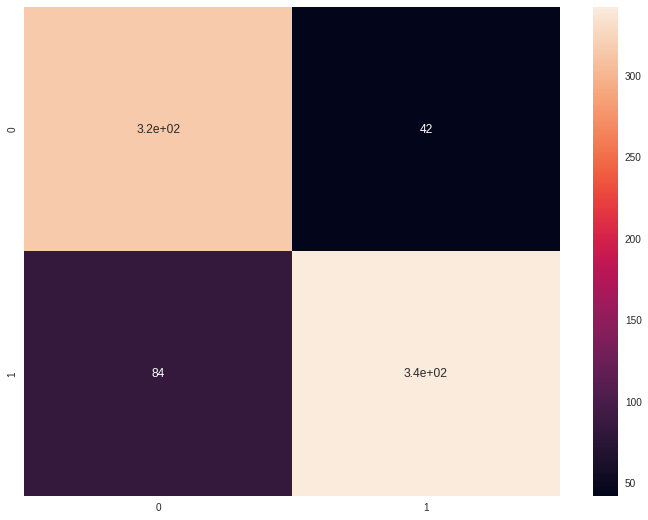

In [ ]:
from sklearn.metrics import confusion_matrix
#y_test = label_test
y_pred = lgbm.predict(X1_test)
mat = confusion_matrix(y1_test, y_pred)
plt.figure(figsize=(12, 9))
sns.heatmap(mat, annot=True)
plt.show()

In [ ]:
tn, fp, fn, tp = confusion_matrix(y1_test, y_pred).ravel()
tn,fp,fn,tp

(316, 42, 84, 342)

In [ ]:
accuracy = accuracy_score(y1_test,y_pred)
recall = recall_score(y1_test,y_pred)
precision = precision_score(y1_test,y_pred)
balanced_accuracy = balanced_accuracy_score(y1_test,y_pred)
f1 = f1_score(y1_test,y_pred)
print(f'Accuracy: {accuracy}')
print(f'True Positive Rate {recall}')
print(f'Precision {precision}')
print(f'Balanced accuracy {balanced_accuracy}')
print(f'f1 score {f1}')

Accuracy: 0.8392857142857143
True Positive Rate 0.8028169014084507
Precision 0.890625
Balanced accuracy 0.8427492328271304
f1 score 0.8444444444444446


In [ ]:
# Imprimimos un reporte de clasificación
from sklearn.metrics import classification_report
target_names = ['Faltante', 'No Faltante']
print(classification_report(y1_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    Faltante       0.79      0.88      0.83       358
 No Faltante       0.89      0.80      0.84       426

    accuracy                           0.84       784
   macro avg       0.84      0.84      0.84       784
weighted avg       0.84      0.84      0.84       784



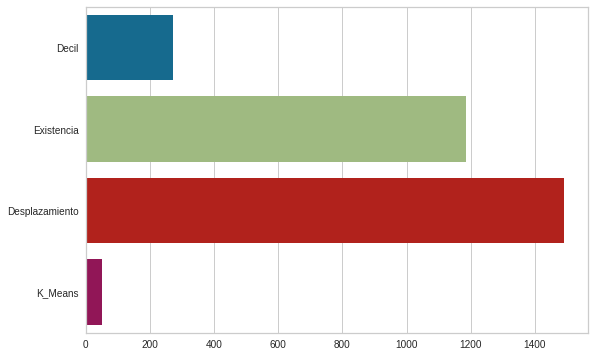

In [ ]:
 Graficar la importancia de las variables
fi2 = pd.Series(lgbm.feature_importances_, index=X1.columns)
fig, ax = plt.subplots(figsize = (9,6))
sns.barplot(x=fi2.values, y=fi2.index, ax=ax)
#ax.bar_label(ax.containers[0]);#

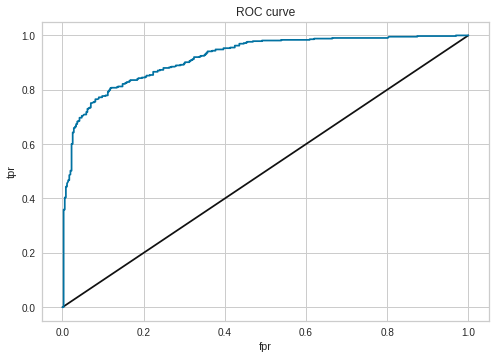

In [ ]:
from sklearn.metrics import roc_curve
y_pred_proba = lgbm.predict_proba(X1_test)[:,1]
fpr, tpr, thresholds = roc_curve(y1_test, y_pred_proba)
plt.plot([0,1],[0,1],'k-')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [ ]:
# Probamos el modelo usando validación cruzada
from sklearn.model_selection import cross_val_score
print(cross_val_score(lgbm, X1_test,y1_test,scoring='accuracy',verbose=1, cv=3))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[0.80534351 0.77394636 0.7816092 ]


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s finished


# Local Cascade Ensemble

* [Reference](https://arxiv.org/abs/2005.03645v2)

In [ ]:
!pip install lcensemble

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Entrenamos un LCE con los parametros por defecto
from lce import LCEClassifier
lce = LCEClassifier(n_jobs=-1, random_state=123)
lce.fit(X1_train, y1_train)
lce.predict(X1_test)
acc_train = lce.score(X1_train,y1_train)
acc_test = lce.score(X1_test,y1_test)
print(f'Precisión entrenamiento: {acc_train.round(4)}, Presición validación: {acc_test.round(4)}')

Precisión entrenamiento: 0.9796, Presición validación: 0.8546


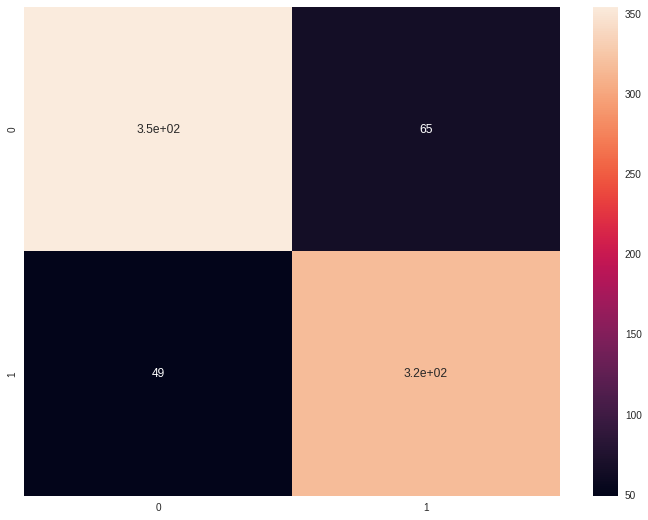

In [ ]:
from sklearn.metrics import confusion_matrix
#y_test = label_test
y_pred = lce.predict(X1_test)
mat = confusion_matrix(y1_test, y_pred)
plt.figure(figsize=(12, 9))
sns.heatmap(mat, annot=True)
plt.show()

In [ ]:
tn, fp, fn, tp = confusion_matrix(y1_test, y_pred).ravel()
tn,fp,fn,tp

(354, 65, 49, 316)

In [ ]:
accuracy = accuracy_score(y1_test,y_pred)
recall = recall_score(y1_test,y_pred)
precision = precision_score(y1_test,y_pred)
balanced_accuracy = balanced_accuracy_score(y1_test,y_pred)
f1 = f1_score(y1_test,y_pred)
print(f'Accuracy: {accuracy}')
print(f'True Positive Rate {recall}')
print(f'Precision {precision}')
print(f'Balanced accuracy {balanced_accuracy}')
print(f'f1 score {f1}')

Accuracy: 0.8545918367346939
True Positive Rate 0.8657534246575342
Precision 0.8293963254593176
Balanced accuracy 0.8553110798705332
f1 score 0.8471849865951743


In [ ]:
# Imprimimos un reporte de clasificación
from sklearn.metrics import classification_report
target_names = ['Faltante', 'No Faltante']
print(classification_report(y1_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    Faltante       0.88      0.84      0.86       419
 No Faltante       0.83      0.87      0.85       365

    accuracy                           0.85       784
   macro avg       0.85      0.86      0.85       784
weighted avg       0.86      0.85      0.85       784



In [ ]:
# Graficar la importancia de las variables
#fi3 = pd.Series(lce.feature_importances_, index=X1.columns)
#fig, ax = plt.subplots(figsize = (9,6))
#sns.barplot(x=fi3.values, y=fi3.index, ax=ax)
#ax.bar_label(ax.containers[0]);

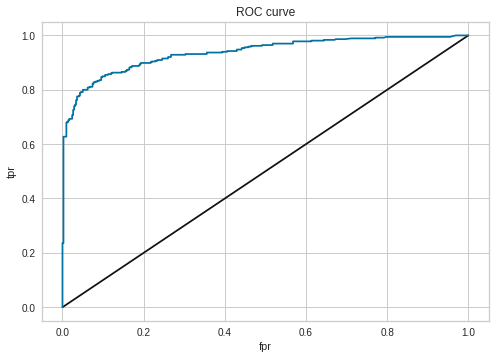

In [ ]:
from sklearn.metrics import roc_curve
y_pred_proba = lce.predict_proba(X1_test)[:,1]
fpr, tpr, thresholds = roc_curve(y1_test, y_pred_proba)
plt.plot([0,1],[0,1],'k-')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [ ]:
# Probamos el modelo usando validación cruzada
from sklearn.model_selection import cross_val_score
print(cross_val_score(lce, X1_test,y1_test,scoring='accuracy',verbose=1, cv=3))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[0.79007634 0.80076628 0.83908046]


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 36.2min finished


# Redes Neuronales

In [ ]:
# Importamos librerías básicas para hacer uso de redes neuronales
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
import torch
from torch import nn, optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
torch.manual_seed(0)

In [ ]:
# Generamos un catálogo de redes neuronales a ser usadas como algoritmo faltante de anaquel

class Red_Ago1(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.hidden_1 = nn.Linear(input_size, 500)
        self.hidden_2 = nn.Linear(500, 500)
        self.hidden_3 = nn.Linear(500, 100)
        self.hidden_4 = nn.Linear(100, 100)
        self.hidden_5 = nn.Linear(100, 100)
        self.hidden_6 = nn.Linear(100, 10)
        self.hidden_7 = nn.Linear(10, 10)
        self.hidden_8 = nn.Linear(10, 10)
        self.hidden_9 = nn.Linear(10, 10)
        self.hidden_10 = nn.Linear(10, 10)
        self.hidden_11 = nn.Linear(10, 10)
        self.hidden_12 = nn.Linear(10, 10)
        self.output = nn.Linear(10, 2)

        self.batchnorm1 = nn.BatchNorm1d(500)
        self.batchnorm2 = nn.BatchNorm1d(500)
        self.batchnorm3 = nn.BatchNorm1d(100)
        self.batchnorm4 = nn.BatchNorm1d(100)
        self.batchnorm5 = nn.BatchNorm1d(100)
        self.batchnorm6 = nn.BatchNorm1d(10)
        self.batchnorm7 = nn.BatchNorm1d(10)
        self.batchnorm8 = nn.BatchNorm1d(10)
        self.batchnorm9 = nn.BatchNorm1d(10)
        self.batchnorm10 = nn.BatchNorm1d(10)
        self.batchnorm11 = nn.BatchNorm1d(10)

    def forward(self, x):
        z = F.relu(self.hidden_1(x))
        z = self.batchnorm1(z)
        z = F.relu(self.hidden_2(z))
        z = self.batchnorm2(z)
        z = F.relu(self.hidden_3(z))
        z = self.batchnorm3(z)
        z = F.relu(self.hidden_4(z))
        z = self.batchnorm4(z)
        z = F.relu(self.hidden_5(z))
        z = self.batchnorm5(z)
        z = F.relu(self.hidden_6(z))
        z = self.batchnorm6(z)
        z = F.relu(self.hidden_7(z))
        z = self.batchnorm7(z)
        z = F.relu(self.hidden_8(z))
        z = self.batchnorm8(z)
        z= F.relu(self.hidden_9(z))
        z = self.batchnorm9(z)
        z = F.relu(self.hidden_10(z))
        z = self.batchnorm10(z)
        z = F.relu(self.hidden_11(z))
        z = self.batchnorm11(z)
        z = F.relu(self.hidden_12(z))

        out = F.log_softmax(self.output(z), dim=1)

        return out

class Red_Ago2(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.hidden_1 = nn.Linear(input_size, 500)
        self.hidden_2 = nn.Linear(500, 500)
        self.hidden_3 = nn.Linear(500, 100)
        self.hidden_4 = nn.Linear(100, 100)
        self.hidden_5 = nn.Linear(100, 100)
        self.hidden_6 = nn.Linear(100, 10)
        self.hidden_7 = nn.Linear(10, 10)
        self.hidden_8 = nn.Linear(10, 10)
        self.hidden_9 = nn.Linear(10, 10)
        self.hidden_10 = nn.Linear(10, 10)
        self.hidden_11 = nn.Linear(10, 10)
        self.hidden_12 = nn.Linear(10, 10)
        self.output = nn.Linear(10, 2)

        self.batchnorm1 = nn.BatchNorm1d(500)
        self.batchnorm2 = nn.BatchNorm1d(500)
        self.batchnorm3 = nn.BatchNorm1d(100)
        self.batchnorm4 = nn.BatchNorm1d(100)
        self.batchnorm5 = nn.BatchNorm1d(100)
        self.batchnorm6 = nn.BatchNorm1d(10)
        self.batchnorm7 = nn.BatchNorm1d(10)
        self.batchnorm8 = nn.BatchNorm1d(10)
        self.batchnorm9 = nn.BatchNorm1d(10)
        self.batchnorm10 = nn.BatchNorm1d(10)
        self.batchnorm11 = nn.BatchNorm1d(10)

    def forward(self, x):
        z = F.relu(self.hidden_1(x))
        z = self.batchnorm1(z)
        z = F.relu(self.hidden_2(z))
        z = self.batchnorm2(z)
        z = F.relu(self.hidden_3(z))
        z = self.batchnorm3(z)
        z = F.relu(self.hidden_4(z))
        z = self.batchnorm4(z)
        z = F.relu(self.hidden_5(z))
        z = self.batchnorm5(z)
        z = F.relu(self.hidden_6(z))
        z = self.batchnorm6(z)
        z = F.relu(self.hidden_7(z))
        z = self.batchnorm7(z)
        z = F.relu(self.hidden_8(z))
        z = self.batchnorm8(z)
        z= F.relu(self.hidden_9(z))
        z = self.batchnorm9(z)
        z = F.relu(self.hidden_10(z))
        z = self.batchnorm10(z)
        z = F.relu(self.hidden_11(z))
        z = self.batchnorm11(z)
        z = F.relu(self.hidden_12(z))

        out = F.log_softmax(self.output(z), dim=1)

        return out

class Red_Ago3(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.hidden_1 = nn.Linear(input_size, 500)
        self.hidden_2 = nn.Linear(500, 500)
        self.hidden_3 = nn.Linear(500, 100)
        self.hidden_4 = nn.Linear(100, 100)
        self.hidden_5 = nn.Linear(100, 100)
        self.hidden_6 = nn.Linear(100, 10)
        self.hidden_7 = nn.Linear(10, 10)
        self.hidden_8 = nn.Linear(10, 10)
        self.hidden_9 = nn.Linear(10, 10)
        self.hidden_10 = nn.Linear(10, 10)
        self.hidden_11 = nn.Linear(10, 10)
        self.hidden_12 = nn.Linear(10, 10)
        self.output = nn.Linear(10, 2)

        self.batchnorm1 = nn.BatchNorm1d(500)
        self.batchnorm2 = nn.BatchNorm1d(500)
        self.batchnorm3 = nn.BatchNorm1d(100)
        self.batchnorm4 = nn.BatchNorm1d(100)
        self.batchnorm5 = nn.BatchNorm1d(100)
        self.batchnorm6 = nn.BatchNorm1d(10)
        self.batchnorm7 = nn.BatchNorm1d(10)
        self.batchnorm8 = nn.BatchNorm1d(10)
        self.batchnorm9 = nn.BatchNorm1d(10)
        self.batchnorm10 = nn.BatchNorm1d(10)
        self.batchnorm11 = nn.BatchNorm1d(10)

    def forward(self, x):
        z = F.relu(self.hidden_1(x))
        z = self.batchnorm1(z)
        z = F.relu(self.hidden_2(z))
        z = self.batchnorm2(z)
        z = F.relu(self.hidden_3(z))
        z = self.batchnorm3(z)
        z = F.relu(self.hidden_4(z))
        z = self.batchnorm4(z)
        z = F.relu(self.hidden_5(z))
        z = self.batchnorm5(z)
        z = F.relu(self.hidden_6(z))
        z = self.batchnorm6(z)
        z = F.relu(self.hidden_7(z))
        z = self.batchnorm7(z)
        z = F.relu(self.hidden_8(z))
        z = self.batchnorm8(z)
        z= F.relu(self.hidden_9(z))
        z = self.batchnorm9(z)
        z = F.relu(self.hidden_10(z))
        z = self.batchnorm10(z)
        z = F.relu(self.hidden_11(z))
        z = self.batchnorm11(z)
        z = F.relu(self.hidden_12(z))

        out = F.log_softmax(self.output(z), dim=1)

        return out

## Experimentos con redes neuronales (usamos agrupación k-means).

In [ ]:
# Construímos una copia con los datos obtenidos luego de aplicar una agrupación k-means.
features = X1.copy()
target = y1.copy()

NameError: ignored

In [ ]:
# Segmentamos nuestros datos en entrenamiento-prueba y validación.
X_new, X_test, y_new, y_test = train_test_split(features,target, test_size=0.2, random_state=0)
dev_per = X_test.shape[0]/X_new.shape[0]
X_train, X_dev, y_train, y_dev = train_test_split(X_new, y_new, test_size=dev_per, random_state=0)

NameError: ignored

In [ ]:
# Pasamos nuestros datos de prueba a tensores (los elementos de entrenaminto serán convertidos durante el entrenamiento)
X_dev_torch = torch.tensor(X_dev.values).float()
y_dev_torch = torch.tensor(y_dev.values)
X_test_torch = torch.tensor(X_test.values).float()
y_test_torch = torch.tensor(y_test.values)

In [ ]:
# Experimento con agrupación K-means
model1 = Red_Ago1(X_train.shape[1]).to('cuda')
criterion = nn.NLLLoss()
optimizer = optim.AdamW(model1.parameters(), lr=0.001)

epochs = 1000
batch_size = 128


train_losses, dev_losses, train_acc, dev_acc= [], [], [], []
x_axis = []

for e in range(1,epochs+1):
    X_, y_ = shuffle(X_train, y_train)
    running_loss = 0
    running_acc = 0
    iterations = 0

    for i in range(0, len(X_), batch_size):
        iterations += 1
        b = i + batch_size
        X_batch = torch.tensor(X_.iloc[i:b,:].values).float()
        y_batch = torch.tensor(y_.iloc[i:b].values)

        log_ps = model1(X_batch.to('cuda'))
        loss = criterion(log_ps, y_batch.to('cuda'))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        ps = torch.exp(log_ps)
        top_p, top_class = ps.topk(1, dim=1)
        running_acc += accuracy_score(y_batch.to('cpu'), top_class.to('cpu'))

    dev_loss = 0
    acc = 0

    # Turn off gradients for validation, saves memory and computations
    with torch.no_grad():
        log_dev = model1(X_test_torch.to('cuda'))
        dev_loss = criterion(log_dev, y_test_torch.to('cuda'))

        ps_dev = torch.exp(log_dev)
        top_p, top_class_dev = ps_dev.topk(1, dim=1)
        acc = accuracy_score(y_test_torch.to('cpu'), top_class_dev.to('cpu'))

    if e%200 == 0 or e == 1:
        x_axis.append(e)

        train_losses.append(running_loss/iterations)
        dev_losses.append(dev_loss)
        train_acc.append(running_acc/iterations)
        dev_acc.append(acc)

        print("Epoch: {}/{}.. ".format(e, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/iterations),
              "Validation Loss: {:.3f}.. ".format(dev_loss),
              "Training Accuracy: {:.3f}.. ".format(running_acc/iterations),
              "Validation Accuracy: {:.3f}".format(acc))

checkpoint = {"input": X_train.shape[1], \
"state_dict": model.state_dict()}
torch.save(checkpoint, "checkpoint.pth")


Epoch: 1/1000..  Training Loss: 0.697..  Validation Loss: 0.655..  Training Accuracy: 0.538..  Validation Accuracy: 0.587
Epoch: 200/1000..  Training Loss: 0.452..  Validation Loss: 0.420..  Training Accuracy: 0.795..  Validation Accuracy: 0.809
Epoch: 400/1000..  Training Loss: 0.442..  Validation Loss: 0.412..  Training Accuracy: 0.792..  Validation Accuracy: 0.809
Epoch: 600/1000..  Training Loss: 0.435..  Validation Loss: 0.414..  Training Accuracy: 0.787..  Validation Accuracy: 0.801
Epoch: 800/1000..  Training Loss: 0.411..  Validation Loss: 0.406..  Training Accuracy: 0.807..  Validation Accuracy: 0.807
Epoch: 1000/1000..  Training Loss: 0.412..  Validation Loss: 0.408..  Training Accuracy: 0.806..  Validation Accuracy: 0.805


AttributeError: ignored

In [ ]:
# Efectuamos un análisis de errores para la red neuronal RedAgo1
# Alojamos los tensores de validación en la gpu de Google
log_dev  = model1(X_dev_torch.to('cuda'))
dev_loss = criterion(log_dev, y_dev_torch.to('cuda'))
ps_dev = torch.exp(log_dev)
top_p, top_class_dev = ps_dev.topk(1, dim=1)

accuracy = accuracy_score(y_dev_torch.to('cpu'),top_class_dev.to('cpu'))
recall = recall_score(y_dev_torch.to('cpu'),top_class_dev.to('cpu'))
precision = precision_score(y_dev_torch.to('cpu'),top_class_dev.to('cpu'))
balanced_accuracy = balanced_accuracy_score(y_dev_torch.to('cpu'),top_class_dev.to('cpu'))
f1 = f1_score(y_dev_torch.to('cpu'),top_class_dev.to('cpu'))
print(f'Accuracy: {accuracy}')
print(f'True Positive Rate {recall}')
print(f'Precision {precision}')
print(f'Balanced accuracy {balanced_accuracy}')
print(f'f1 score {f1}')

In [ ]:

model2 = Red_Ago2(X_train.shape[1]).to('cuda')
criterion = nn.NLLLoss()
optimizer = optim.AdamW(model2.parameters(), lr=0.0001)

epochs = 3000
batch_size = 128


train_losses, dev_losses, train_acc, dev_acc= [], [], [], []
x_axis = []

for e in range(1,epochs+1):
    X_, y_ = shuffle(X_train, y_train)
    running_loss = 0
    running_acc = 0
    iterations = 0

    for i in range(0, len(X_), batch_size):
        iterations += 1
        b = i + batch_size
        X_batch = torch.tensor(X_.iloc[i:b,:].values).float()
        y_batch = torch.tensor(y_.iloc[i:b].values)

        log_ps = model2(X_batch.to('cuda'))
        loss = criterion(log_ps, y_batch.to('cuda'))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        ps = torch.exp(log_ps)
        top_p, top_class = ps.topk(1, dim=1)
        running_acc += accuracy_score(y_batch.to('cpu'), top_class.to('cpu'))

    dev_loss = 0
    acc = 0

    # Turn off gradients for validation, saves memory and computations
    with torch.no_grad():
        log_dev = model2(X_test_torch.to('cuda'))
        dev_loss = criterion(log_dev, y_test_torch.to('cuda'))

        ps_dev = torch.exp(log_dev)
        top_p, top_class_dev = ps_dev.topk(1, dim=1)
        acc = accuracy_score(y_test_torch.to('cpu'), top_class_dev.to('cpu'))

    if e%200 == 0 or e == 1:
        x_axis.append(e)

        train_losses.append(running_loss/iterations)
        dev_losses.append(dev_loss)
        train_acc.append(running_acc/iterations)
        dev_acc.append(acc)

        print("Epoch: {}/{}.. ".format(e, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/iterations),
              "Validation Loss: {:.3f}.. ".format(dev_loss),
              "Training Accuracy: {:.3f}.. ".format(running_acc/iterations),
              "Validation Accuracy: {:.3f}".format(acc))

In [ ]:
# Efectuamos un análisis de errores para la red neuronal RedAgo1
# Alojamos los tensores de validación en la gpu de Google
log_dev  = model2(X_dev_torch.to('cuda'))
dev_loss = criterion(log_dev, y_dev_torch.to('cuda'))
ps_dev = torch.exp(log_dev)
top_p, top_class_dev = ps_dev.topk(1, dim=1)

accuracy = accuracy_score(y_dev_torch.to('cpu'),top_class_dev.to('cpu'))
recall = recall_score(y_dev_torch.to('cpu'),top_class_dev.to('cpu'))
precision = precision_score(y_dev_torch.to('cpu'),top_class_dev.to('cpu'))
balanced_accuracy = balanced_accuracy_score(y_dev_torch.to('cpu'),top_class_dev.to('cpu'))
f1 = f1_score(y_dev_torch.to('cpu'),top_class_dev.to('cpu'))
print(f'Accuracy: {accuracy}')
print(f'True Positive Rate {recall}')
print(f'Precision {precision}')
print(f'Balanced accuracy {balanced_accuracy}')
print(f'f1 score {f1}')

In [ ]:
#Entrenamos la red Red_Ago3 consiguiendo 94% de media como val_Acc 

model3 = Red_Ago3(X_train.shape[1]).to('cuda')
criterion = nn.NLLLoss()
optimizer = optim.AdamW(model3.parameters(), lr=0.0001)

epochs = 2000
batch_size = 128


train_losses, dev_losses, train_acc, dev_acc= [], [], [], []
x_axis = []

for e in range(1,epochs+1):
    X_, y_ = shuffle(X_train, y_train)
    running_loss = 0
    running_acc = 0
    iterations = 0

    for i in range(0, len(X_), batch_size):
        iterations += 1
        b = i + batch_size
        X_batch = torch.tensor(X_.iloc[i:b,:].values).float()
        y_batch = torch.tensor(y_.iloc[i:b].values)

        log_ps = model3(X_batch.to('cuda'))
        loss = criterion(log_ps, y_batch.to('cuda'))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        ps = torch.exp(log_ps)
        top_p, top_class = ps.topk(1, dim=1)
        running_acc += accuracy_score(y_batch.to('cpu'), top_class.to('cpu'))

    dev_loss = 0
    acc = 0

    # Turn off gradients for validation, saves memory and computations
    with torch.no_grad():
        log_dev = model3(X_test_torch.to('cuda'))
        dev_loss = criterion(log_dev, y_test_torch.to('cuda'))

        ps_dev = torch.exp(log_dev)
        top_p, top_class_dev = ps_dev.topk(1, dim=1)
        acc = accuracy_score(y_test_torch.to('cpu'), top_class_dev.to('cpu'))

    if e%200 == 0 or e == 1:
        x_axis.append(e)

        train_losses.append(running_loss/iterations)
        dev_losses.append(dev_loss)
        train_acc.append(running_acc/iterations)
        dev_acc.append(acc)

        print("Epoch: {}/{}.. ".format(e, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/iterations),
              "Validation Loss: {:.3f}.. ".format(dev_loss),
              "Training Accuracy: {:.3f}.. ".format(running_acc/iterations),
              "Validation Accuracy: {:.3f}".format(acc))

In [ ]:
# Efectuamos un análisis de errores para la red neuronal RedAgo1
# Alojamos los tensores de validación en la gpu de Google
log_dev  = model3(X_dev_torch.to('cuda'))
dev_loss = criterion(log_dev, y_dev_torch.to('cuda'))
ps_dev = torch.exp(log_dev)
top_p, top_class_dev = ps_dev.topk(1, dim=1)

accuracy = accuracy_score(y_dev_torch.to('cpu'),top_class_dev.to('cpu'))
recall = recall_score(y_dev_torch.to('cpu'),top_class_dev.to('cpu'))
precision = precision_score(y_dev_torch.to('cpu'),top_class_dev.to('cpu'))
balanced_accuracy = balanced_accuracy_score(y_dev_torch.to('cpu'),top_class_dev.to('cpu'))
f1 = f1_score(y_dev_torch.to('cpu'),top_class_dev.to('cpu'))
print(f'Accuracy: {accuracy}')
print(f'True Positive Rate {recall}')
print(f'Precision {precision}')
print(f'Balanced accuracy {balanced_accuracy}')
print(f'f1 score {f1}')

## Experimentos con redes neuronales sin agrupación K-means

In [ ]:
X = X.drop(columns=['Decil'])
# Recuerde la definición de 'y' dada en la primer sección del cuaderno.
# Segmentamos nuestros datos en entrenamiento-prueba y validación.
X_new, X_test, y_new, y_test = train_test_split(X,y, test_size=0.2, random_state=0)
dev_per = X_test.shape[0]/X_new.shape[0]
X_train, X_dev, y_train, y_dev = train_test_split(X_new, y_new, test_size=dev_per, random_state=0)

In [ ]:
# Pasamos nuestros datos de prueba a tensores (los elementos de entrenaminto serán convertidos durante el entrenamiento)
X_dev_torch = torch.tensor(X_dev.values).float()
y_dev_torch = torch.tensor(y_dev.values)
X_test_torch = torch.tensor(X_test.values).float()
y_test_torch = torch.tensor(y_test.values)

In [ ]:
model4 = Red_Ago1(X_train.shape[1]).to('cuda')
criterion = nn.NLLLoss()
optimizer = optim.AdamW(model4.parameters(), lr=0.0001)

epochs = 3000
batch_size = 128


train_losses, dev_losses, train_acc, dev_acc= [], [], [], []
x_axis = []

for e in range(1,epochs+1):
    X_, y_ = shuffle(X_train, y_train)
    running_loss = 0
    running_acc = 0
    iterations = 0

    for i in range(0, len(X_), batch_size):
        iterations += 1
        b = i + batch_size
        X_batch = torch.tensor(X_.iloc[i:b,:].values).float()
        y_batch = torch.tensor(y_.iloc[i:b].values)

        log_ps = model4(X_batch.to('cuda'))
        loss = criterion(log_ps, y_batch.to('cuda'))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        ps = torch.exp(log_ps)
        top_p, top_class = ps.topk(1, dim=1)
        running_acc += accuracy_score(y_batch.to('cpu'), top_class.to('cpu'))

    dev_loss = 0
    acc = 0

    # Turn off gradients for validation, saves memory and computations
    with torch.no_grad():
        log_dev = model4(X_test_torch.to('cuda'))
        dev_loss = criterion(log_dev, y_test_torch.to('cuda'))

        ps_dev = torch.exp(log_dev)
        top_p, top_class_dev = ps_dev.topk(1, dim=1)
        acc = accuracy_score(y_test_torch.to('cpu'), top_class_dev.to('cpu'))

    if e%200 == 0 or e == 1:
        x_axis.append(e)

        train_losses.append(running_loss/iterations)
        dev_losses.append(dev_loss)
        train_acc.append(running_acc/iterations)
        dev_acc.append(acc)

        print("Epoch: {}/{}.. ".format(e, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/iterations),
              "Validation Loss: {:.3f}.. ".format(dev_loss),
              "Training Accuracy: {:.3f}.. ".format(running_acc/iterations),
              "Validation Accuracy: {:.3f}".format(acc))

In [ ]:
# Efectuamos un análisis de errores para la red neuronal RedAgo1
# Alojamos los tensores de validación en la gpu de Google
log_dev  = model4(X_dev_torch.to('cuda'))
dev_loss = criterion(log_dev, y_dev_torch.to('cuda'))
ps_dev = torch.exp(log_dev)
top_p, top_class_dev = ps_dev.topk(1, dim=1)

accuracy = accuracy_score(y_dev_torch.to('cpu'),top_class_dev.to('cpu'))
recall = recall_score(y_dev_torch.to('cpu'),top_class_dev.to('cpu'))
precision = precision_score(y_dev_torch.to('cpu'),top_class_dev.to('cpu'))
balanced_accuracy = balanced_accuracy_score(y_dev_torch.to('cpu'),top_class_dev.to('cpu'))
f1 = f1_score(y_dev_torch.to('cpu'),top_class_dev.to('cpu'))
print(f'Accuracy: {accuracy}')
print(f'True Positive Rate {recall}')
print(f'Precision {precision}')
print(f'Balanced accuracy {balanced_accuracy}')
print(f'f1 score {f1}')

In [ ]:
model5 = Red_Ago3(X_train.shape[1]).to('cuda')
criterion = nn.NLLLoss()
optimizer = optim.AdamW(model5.parameters(), lr=0.0001)

epochs = 4000
batch_size = 128


train_losses, dev_losses, train_acc, dev_acc= [], [], [], []
x_axis = []

for e in range(1,epochs+1):
    X_, y_ = shuffle(X_train, y_train)
    running_loss = 0
    running_acc = 0
    iterations = 0

    for i in range(0, len(X_), batch_size):
        iterations += 1
        b = i + batch_size
        X_batch = torch.tensor(X_.iloc[i:b,:].values).float()
        y_batch = torch.tensor(y_.iloc[i:b].values)

        log_ps = model5(X_batch.to('cuda'))
        loss = criterion(log_ps, y_batch.to('cuda'))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        ps = torch.exp(log_ps)
        top_p, top_class = ps.topk(1, dim=1)
        running_acc += accuracy_score(y_batch.to('cpu'), top_class.to('cpu'))

    dev_loss = 0
    acc = 0

    # Turn off gradients for validation, saves memory and computations
    with torch.no_grad():
        log_dev = model5(X_test_torch.to('cuda'))
        dev_loss = criterion(log_dev, y_test_torch.to('cuda'))

        ps_dev = torch.exp(log_dev)
        top_p, top_class_dev = ps_dev.topk(1, dim=1)
        acc = accuracy_score(y_test_torch.to('cpu'), top_class_dev.to('cpu'))

    if e%200 == 0 or e == 1:
        x_axis.append(e)

        train_losses.append(running_loss/iterations)
        dev_losses.append(dev_loss)
        train_acc.append(running_acc/iterations)
        dev_acc.append(acc)

        print("Epoch: {}/{}.. ".format(e, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/iterations),
              "Validation Loss: {:.3f}.. ".format(dev_loss),
              "Training Accuracy: {:.3f}.. ".format(running_acc/iterations),
              "Validation Accuracy: {:.3f}".format(acc))

In [ ]:
# Efectuamos un análisis de errores para la red neuronal RedAgo1
# Alojamos los tensores de validación en la gpu de Google
log_dev  = model5(X_dev_torch.to('cuda'))
dev_loss = criterion(log_dev, y_dev_torch.to('cuda'))
ps_dev = torch.exp(log_dev)
top_p, top_class_dev = ps_dev.topk(1, dim=1)

accuracy = accuracy_score(y_dev_torch.to('cpu'),top_class_dev.to('cpu'))
recall = recall_score(y_dev_torch.to('cpu'),top_class_dev.to('cpu'))
precision = precision_score(y_dev_torch.to('cpu'),top_class_dev.to('cpu'))
balanced_accuracy = balanced_accuracy_score(y_dev_torch.to('cpu'),top_class_dev.to('cpu'))
f1 = f1_score(y_dev_torch.to('cpu'),top_class_dev.to('cpu'))
print(f'Accuracy: {accuracy}')
print(f'True Positive Rate {recall}')
print(f'Precision {precision}')
print(f'Balanced accuracy {balanced_accuracy}')
print(f'f1 score {f1}')